## Mercari Price Suggestion

## Overview

Mercari is an online platform that allows people sell anything in a price range from  3 to 2000 dollars, and Mercari will charge a flat 10% for each sale. People who vitis this app will see only price, photo and number of like of each item.
The object of this challenge is to develope a model that helps seller pricing their products. The dataset comprises 7 features and the target to predict is price. Features of name, category_name and item_description are text data, therefore this project is related to Natural Language Processing. 
The submission of result will contents pairs of ID and price




Roadmap:

1. Exploratory Data Analysis
2. Dimentionality reduction
3. Resampling Data
4. Filtering outliers
5. Train-test split
6. Modeling
7. Statistical Analysis
   

In [293]:
import sys
import pandas as pd
import numpy as np 
import scipy
import IPython
import sklearn

In [294]:
# Update to python 3.6.2 on Aug 26, 2018

print('python version: {}'.format(sys.version))
print('pandas version: {}'.format(pd.__version__))
print('numpy version: {}'.format(np.__version__))
print('scipy version: {}'.format(scipy.__version__))
print('Ipython version: {}'.format(scipy.__version__))
print('sklearn version: {}'.format(scipy.__version__))

python version: 3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.22.0
numpy version: 1.12.1
scipy version: 1.0.0
Ipython version: 1.0.0
sklearn version: 1.0.0


In [295]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

In [296]:
import os

os.getcwd()

'/Users/shangluntsai/Projects/public/Mercari_Price_Suggestion'

In [297]:
fname = os.path.expanduser('~/Projects/public/datasets/mercari/train.tsv')
funseen = os.path.expanduser('~/Projects/public/datasets/mercari/test.tsv')

In [298]:
df = pd.read_csv(fname, delimiter='\t') 
dfv = pd.read_csv(funseen, delimiter='\t')

## Exploratory Data Analysis

In [299]:
df.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [300]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [301]:
dir(df)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',


In [302]:
df.describe()

,train_id,item_condition_id,price,shipping
count,29999.000000,29999.000000,29999.000000,29999.000000
mean,14999.000000,1.906164,26.953582,0.447715
std,8660.109699,0.906798,40.394998,0.497267
min,0.000000,1.000000,0.000000,0.000000
25%,7499.500000,1.000000,10.000000,0.000000
50%,14999.000000,2.000000,17.000000,0.000000
75%,22498.500000,3.000000,29.000000,1.000000
max,29998.000000,5.000000,1506.000000,1.000000


In [303]:
df_cols = list(df.columns.values)
df_cols

['train_id',
 'name',
 'item_condition_id',
 'category_name',
 'brand_name',
 'price',
 'shipping',
 'item_description']

In [304]:
dfv_cols = list(dfv.columns.values)
dfv_cols

['test_id',
 'name',
 'item_condition_id',
 'category_name',
 'brand_name',
 'shipping',
 'item_description']

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 8 columns):
train_id             29999 non-null int64
name                 29999 non-null object
item_condition_id    29999 non-null int64
category_name        29854 non-null object
brand_name           17123 non-null object
price                29999 non-null float64
shipping             29999 non-null int64
item_description     29999 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 1.8+ MB


In [306]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 7 columns):
test_id              29999 non-null int64
name                 29999 non-null object
item_condition_id    29999 non-null int64
category_name        29855 non-null object
brand_name           17150 non-null object
shipping             29999 non-null int64
item_description     29999 non-null object
dtypes: int64(3), object(4)
memory usage: 1.6+ MB


In [307]:
typedf = df.dtypes.reset_index()
typedf.columns = ['Count', 'Data Type']
typedf.groupby('Data Type').aggregate('count').reset_index()

,Data Type,Count
0,int64,3
1,float64,1
2,object,4


## Data munging

In [308]:
# Split column "category_name" by delimiter for better learning

def col_splitter(row):
    try:
        text = row
        text1, text2, text3 = text.split('/')
        return text1, text2, text3
    except:
        return 'missing', 'missing', 'missing'

    
def cat_transformer(data):
    data['primary_cat'], data['subcat_1'], data['subcat_2'] = \
    zip(*data.category_name.apply(lambda val: col_splitter(val)))
    data.drop('category_name', axis=1, inplace=True)

In [309]:
# training data

cat_transformer(df)
df.head()

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,primary_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [310]:
# unseen data

cat_transformer(dfv)
dfv.head()

,test_id,name,item_condition_id,brand_name,shipping,item_description,primary_cat,subcat_1,subcat_2
0,0,"Breast cancer ""I fight like a girl"" ring",1,NaN,1,Size 7,Women,Jewelry,Rings
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined...",Other,Office supplies,Shipping Supplies
2,2,Coach bag,1,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...,Vintage & Collectibles,Bags and Purses,Handbag
3,3,Floral Kimono,2,NaN,0,-floral kimono -never worn -lightweight and pe...,Women,Sweaters,Cardigan
4,4,Life after Death,3,NaN,1,Rediscovering life after the loss of a loved o...,Other,Books,Religion & Spirituality


In [311]:
# Replacing NaN value with "missing"

def fill_missing(data):
    data['brand_name'].fillna(value='missing', inplace=True)
    data['primary_cat'].fillna(value='missing', inplace=True)
    data['subcat_1'].fillna(value='missing', inplace=True)
    data['subcat_2'].fillna(value='missing', inplace=True)

    
# traning data
fill_missing(df)

# unseen data
fill_missing(dfv)

In [312]:
# cutting data - picking top 4000 popular brands and top 1000 categories to avoid overfitting

BRAND_COUNT = 4000
CAT_COUNT = 1000

def cutting_data(data):
    pop_brand = data['brand_name'].value_counts().loc[lambda x: x.index != 'missing'].index[:BRAND_COUNT,]
    pop_category1 = data['primary_cat'].value_counts().loc[lambda x: x.index != 'missing'].index[:CAT_COUNT,]
    pop_category2 = data['subcat_1'].value_counts().loc[lambda x: x.index != 'missing'].index[:CAT_COUNT,]
    pop_category3 = data['subcat_2'].value_counts().loc[lambda x: x.index != 'missing'].index[:CAT_COUNT,]
    
    data.loc[~data['brand_name'].isin(pop_brand), 'brand_name'] = 'missing'
    data.loc[~data['primary_cat'].isin(pop_category1), 'primary_cat'] = 'missing'
    data.loc[~data['subcat_1'].isin(pop_category2), 'subcat_1'] = 'missing'
    data.loc[~data['subcat_2'].isin(pop_category3), 'subcat_2'] = 'missing'

# traning data    
cutting_data(df)

# unseen data
cutting_data(dfv)

In [313]:
# transfor object columns into category type

def to_category(data):
    data['name'] = data['name'].astype('category')
    data['brand_name'] = data['brand_name'].astype('category')
    data['item_description'] = data['item_description'].astype('category')
    data['primary_cat'] = data['primary_cat'].astype('category')
    data['subcat_1'] = data['subcat_1'].astype('category')
    data['subcat_2'] = data['subcat_2'].astype('category')

# training data
to_category(df)

# unseen data
to_category(dfv)

In [314]:
# Encoding Categorical Columns

def cat_encoder(data):
    data['name'] = data['name'].cat.codes
    data['brand_name'] = data['brand_name'].cat.codes
    data['item_description'] = data['item_description'].cat.codes
    data['primary_cat'] = data['primary_cat'].cat.codes
    data['subcat_1'] = data['subcat_1'].cat.codes
    data['subcat_2'] = data['subcat_2'].cat.codes

# training data
cat_encoder(df)

# unseen data
cat_encoder(dfv)

## Modeling

In [315]:
# spliting train.csv into feature data and target data

feature = df[['name', 'item_condition_id', 'brand_name', 'shipping', 'item_description', 'primary_cat', 'subcat_1', 'subcat_2']]
target = df.iloc[:, df.columns == "price"] 

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3)

### Random Forest Regressor 

In [316]:
random_forest = RandomForestRegressor(n_jobs=-1,min_samples_leaf=3,n_estimators=200)

random_forest.fit(feature_train, target_train)
random_forest.score(feature_train, target_train)

/Library/Python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.63501464573171051

## Statistical Analysis

In [327]:
# Get feature importances
feature_list = ['name', 'item_condition_id', 'brand_name', 'shipping', 'item_description', 'primary_cat', \
                'subcat_1', 'subcat_2']
imp_list = random_forest.feature_importances_
feature_imp = list(zip(feature_list, imp_list))

In [328]:
def print_tuple(list):
    for feature, imp in list:
        print("{0} : {1}".format(feature, imp))
        
print_tuple(feature_imp)

name : 0.22856125683599612
item_condition_id : 0.05751603989567702
brand_name : 0.2046165458151105
shipping : 0.02983569029175036
item_description : 0.17033900919648245
primary_cat : 0.04220782027168018
subcat_1 : 0.10808320162202346
subcat_2 : 0.15884043607127998


## Pearson Correlations

In [329]:
df_corr = feature_train[feature_list]

corr = df_corr.corr()
corr

,name,item_condition_id,brand_name,shipping,item_description,primary_cat,subcat_1,subcat_2
name,1.000000,0.011565,0.167501,-0.043430,0.187584,0.034610,0.006021,0.004218
item_condition_id,0.011565,1.000000,-0.145812,-0.190294,0.126709,0.192030,0.048824,0.037565
brand_name,0.167501,-0.145812,1.000000,0.102067,0.005912,-0.119423,-0.055217,0.015354
shipping,-0.043430,-0.190294,0.102067,1.000000,-0.051640,-0.140708,-0.032653,-0.024880
item_description,0.187584,0.126709,0.005912,-0.051640,1.000000,0.086389,0.011753,0.017438
primary_cat,0.034610,0.192030,-0.119423,-0.140708,0.086389,1.000000,0.115108,0.188678
subcat_1,0.006021,0.048824,-0.055217,-0.032653,0.011753,0.115108,1.000000,-0.028504
subcat_2,0.004218,0.037565,0.015354,-0.024880,0.017438,0.188678,-0.028504,1.000000


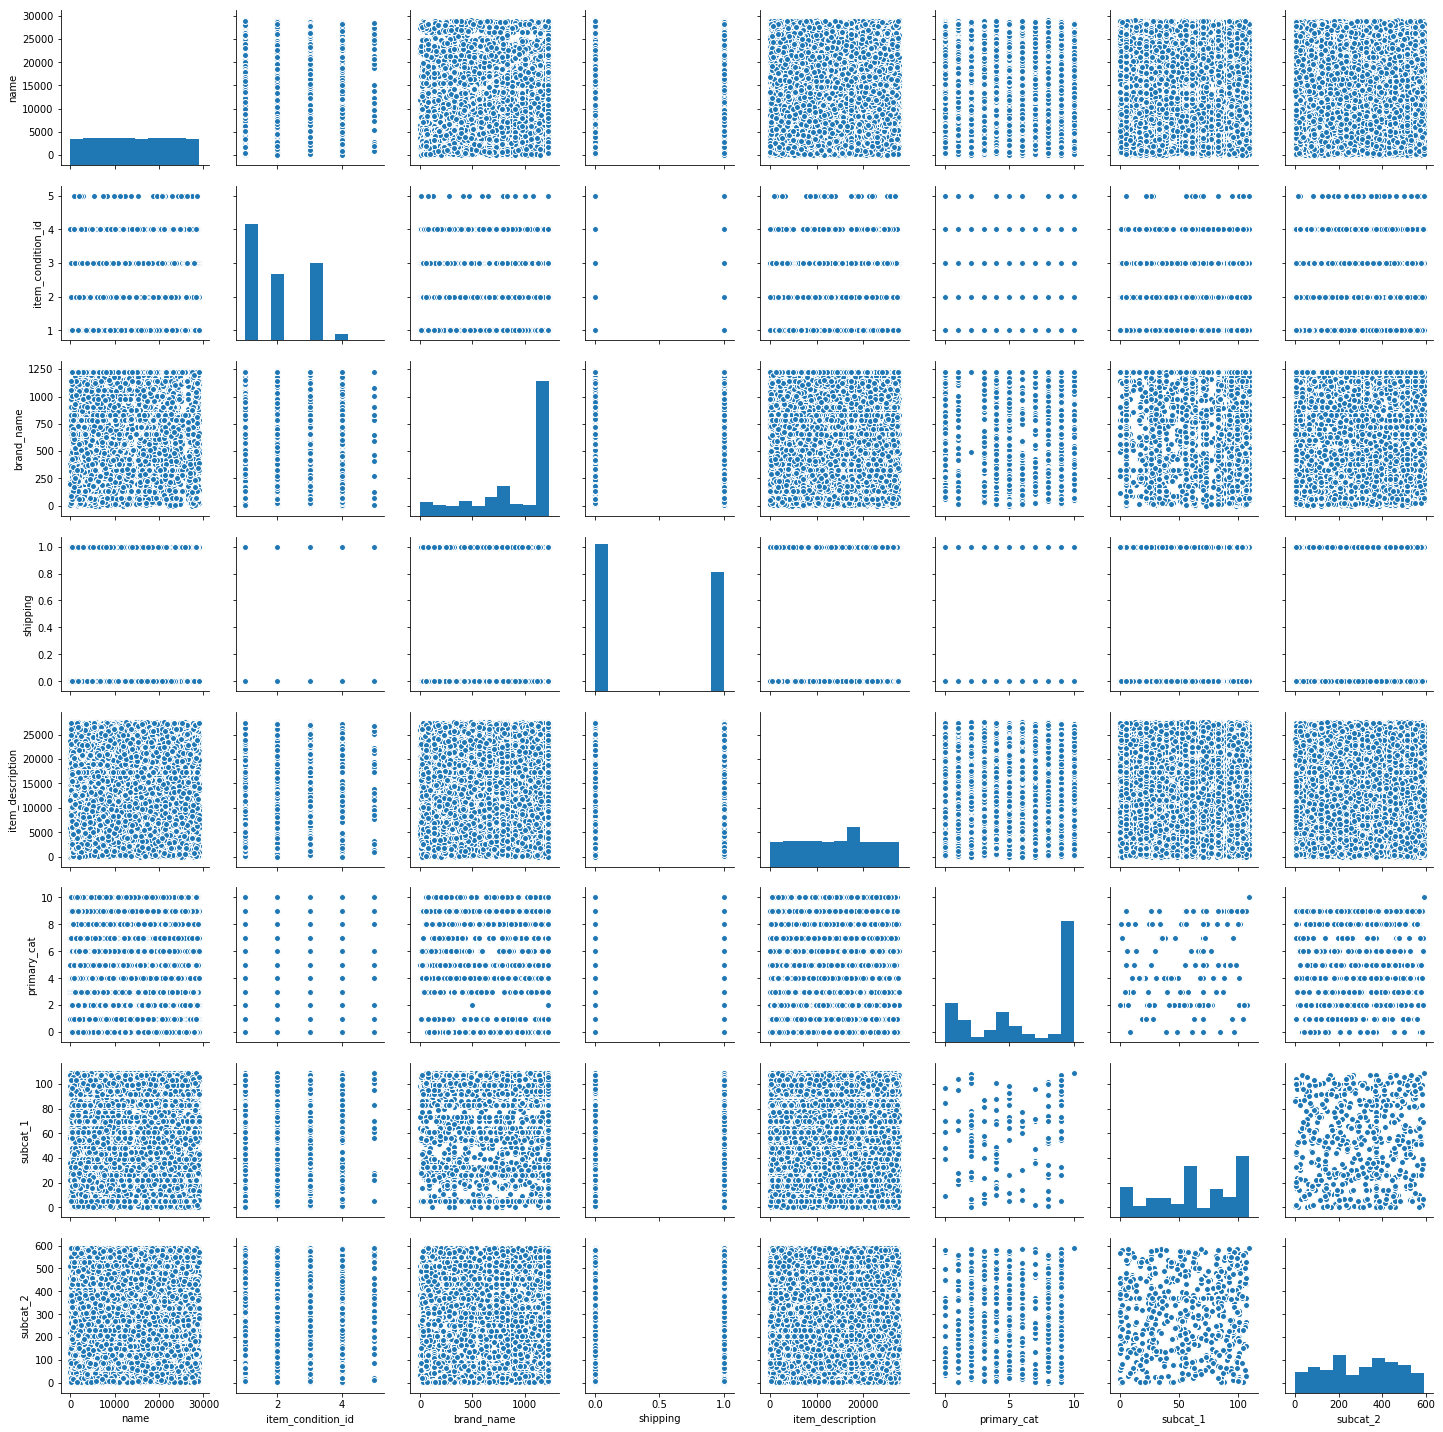

In [332]:
%matplotlib inline
import seaborn as sb

sb.pairplot(df_corr)

## Spearman Rank Correlations

In [333]:
from scipy import stats

name = df_corr['name']
item_condition_id = df_corr['item_condition_id']
brand_name = df_corr['brand_name']
shipping = df_corr['shipping']
item_description = df_corr['item_description']
primary_cat = df_corr['primary_cat']
subcat_1 = df_corr['subcat_1']
subcat_2 = df_corr['subcat_2']


In [337]:
spearmanr_coefficient, p_value = stats.spearmanr(primary_cat, name)
print ('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.043


In [338]:
spearmanr_coefficient, p_value = stats.spearmanr(primary_cat, brand_name)
print ('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.152


In [339]:
spearmanr_coefficient, p_value = stats.spearmanr(item_description, brand_name)
print ('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.018


In [340]:
spearmanr_coefficient, p_value = stats.spearmanr(item_description, name)
print ('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.186


In [341]:
spearmanr_coefficient, p_value = stats.spearmanr(item_description, shipping)
print ('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.051


## Conclusion

The Rendom Forest model train in this project achieve %63.5 of accuracy, which presume need to further improved, the Pearson Correlation among features are pretty low. 
As many other implement deep learning model as well as NLP technique, those could be oprtions for another attempt on this dataset.